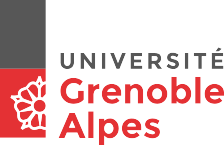

#  **MACHINE LEARNING WITH PYTHON**

## **Projet 6 : Deep Learning with TensorFlow/Keras**

_Groupe_ : Soubeiga Armel, ...

Au cours des dernières années, les méthodes d'apprentissage en profondeur sont devenues de plus en plus populaires, en particulier lorsqu'elles ont atteint une précision époustouflante sur des tâches d'apprentissage automatique telles que la classification des images. La plupart des frameworks pour réseaux de neurones sont interfacés avec Python, le plus populaire étant le TensorFlow de Google et le Keras de l' ancien cerveau de Google . La reconnaissance des chiffres est un exemple typique des réseaux de neurones.

**Exemple d'objectifs:**

* Installer TensorFlow / Keras
* Générer un code pour l'apprentissage d'un classifieur de chiffres à l'aide d'architectures d'apprentissage approfondies
* Produire un cahier de tutoriel sur la façon de le faire

## PLan

* **Introduction**
* **Description : TensorFlow/Keras**
* **Prétraitement des données**
* **Entrainement du réseau**

## Introduction

Nous allons étudier comment faire de la reconnaissance de forme sous python avec TensorFlow/Keras de Keras. Cet rapport est une introduction aux réseaux de neurones. 

Les réseaux de neurones artificiels sont simplement des systèmes inspirés du fonctionnement des neurones biologiques. Ils constituent une méthode puissante pour un large éventail de tâches d’apprentissage automatique. L’idée des réseaux de neurones est de construire un réseau avec des nœuds interconnectés (neurones) qui effectuent différentes opérations. Les nœuds ont des poids, qui sont mis à jour pendant le processus d'apprentissage. Dans un réseau multicouche, plusieurs couches de nœuds sont connectées les unes aux autres

Les données proviennent de  http://yann.lecun.com/exdb/mnist/. Elles consistent en un dossier d’images et deux fichiers train.csv et test.csv. Il s’agit d’une collection d’images représentant chacune un chiffre de 0 à 9, façon écriture manuscrite. L’objectif est de retrouver ce chiffre.

## Description : TensorFlow/Keras

**Keras** est une API de réseaux de neurones de haut niveau, écrit en Python et capable de fonctionner au-dessus de **tensorflow , CNTK ou Théano** . Il a été développé pour permettre une expérimentation rapide et compatible à  **Python 2.7-3.6**

### Objectifs

* Permet un prototypage simple et rapide (convivialité, modularité et extensibilité).
* Prend en charge les réseaux convolutionnels et les réseaux récurrents, ainsi que leurs combinaisons.
* Fonctionne de manière transparente sur le processeur et le processeur graphique.

### Installation

Avant d’installer Keras, veuillez installer l’un de ses moteurs: TensorFlow, Theano ou CNTK. Nous nous interessons à TensorFlow.

* **TensorFlow**

```python
#Current release for CPU-only
pip install tensorflow
```
```python
#Nightly build for CPU-only (unstable)
pip install tf-nightly
```
```python
#GPU package for CUDA-enabled GPU cards
pip install tensorflow-gpu
```
```python
#Nightly build with GPU support (unstable)
pip install tf-nightly-gpu
```
* **Keras**

```python
#Installez Keras à partir de PyPI (recommandé)
sudo pip install keras
pip install keras
```

In [2]:
##Library préparation des données
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
from os import listdir
from os.path import isfile, join
import sys
import time

from six.moves import urllib
from six.moves import xrange  
from scipy.misc import imsave
from scipy import misc
import csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


##Library d'apprentissage
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D, AveragePooling2D, Conv2D
from keras.utils import np_utils
import tensorflow as tf
import math
from math import sqrt


import pylab
from sklearn.model_selection import train_test_split
 
np.random.seed(123)

Nous initialisons également la graine aléatoire pour assurer la reproductibilité

## Prétraitement des données

Nous avons utilisé la base de données de **THE MNIST DATABASE** . C'est une base de données de chiffres manuscrits, contenant 60 000 exemples d'apprentissage et 10 000 exemples de tests. C'est une bonne base de données pour les personnes qui souhaitent essayer des techniques d'apprentissage et des méthodes de reconnaissance de formes sur des données réelles. Elle contient 4 fichiers de format .gz

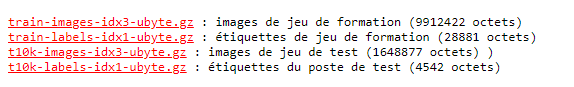

**train-images-idx3-ubyte.gz et test-images-idx3-ubyte.gz** contient la liste des images réelles d’apprentissage. 

**train-labels-idx1-ubyte.gz et test-labels-idx1-ubyte.gz** contiennent la liste des labeles associés à chaque images

Nous avons développé ci-dessous des scripts pour télécharger ces fichiers les extraire, les rendre en pixcéles et les associées à leurs labels. Il faut en premier lieu charger les images (.png) en mémoire à partir du site de **Yann LeCun** et les lire en pixéles.


In [ ]:

SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
WORK_DIRECTORY = 'C:/Users/Soubeiga Armel/Desktop/Mes COURS/SSD_UGA/M2/Python/Projet/Data'
IMAGE_SIZE = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
NUM_LABELS = 10

def maybe_download(filename):
  """function de téléchargement des données"""
  if not tf.gfile.Exists(WORK_DIRECTORY):
    tf.gfile.MakeDirs(WORK_DIRECTORY)
  filepath = os.path.join(WORK_DIRECTORY, filename)
  if not tf.gfile.Exists(filepath):
    filepath, _ = urllib.request.urlretrieve(SOURCE_URL + filename, filepath)
    with tf.gfile.GFile(filepath) as f:
      size = f.Size()
    print('Successfully downloaded', filename, size, 'bytes.')
  return filepath


def extract_data(filename, num_images):
  """function d'extraction des données en format zip.
  Values are rescaled from [0, 255] down to [-0.5, 0.5].
  """
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    #data = (data - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
    return data


def extract_labels(filename, num_images):
  """Function d'extraction des labelles."""
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
  return labels


#exécution function download
train_data_filename = maybe_download('train-images-idx3-ubyte.gz')
train_labels_filename = maybe_download('train-labels-idx1-ubyte.gz')
test_data_filename = maybe_download('t10k-images-idx3-ubyte.gz')
test_labels_filename = maybe_download('t10k-labels-idx1-ubyte.gz')


# Extract it into np arrays.
train_data = extract_data(train_data_filename, 60000)
train_labels = extract_labels(train_labels_filename, 60000)
test_data = extract_data(test_data_filename, 10000)
test_labels = extract_labels(test_labels_filename, 10000)


#Creation de directory
if not os.path.isdir("mnist/train-images"):
   os.makedirs("mnist/train-images")

if not os.path.isdir("mnist/test-images"):
   os.makedirs("mnist/test-images")

# process train data
with open("mnist/train-labels.csv", 'w') as csvFile:
  writer = csv.writer(csvFile, delimiter=',', quotechar='"')
  for i in range(len(train_data)):
    imsave("mnist/train-images/" + str(i) + ".jpg", train_data[i][:,:,0])
    writer.writerow([str(i) + ".jpg", train_labels[i]])



# repeat for test data
with open("mnist/test-labels.csv", 'w') as csvFile:
  writer = csv.writer(csvFile, delimiter=',', quotechar='"')
  for i in range(len(test_data)):
    imsave("mnist/test-images/" + str(i) + ".jpg", test_data[i][:,:,0])
    writer.writerow([str(i) + ".jpg", test_labels[i]])

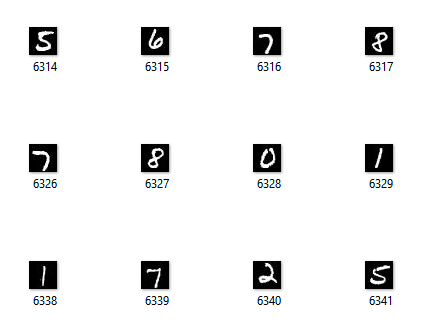

Une fois nous avons extrait les images la suite nous allos les convertir en pixél.

In [13]:
#function conver imgtopx and labellise

def get_digits_images():
    path_train=WORK_DIRECTORY+"/mnist/train-images/"
    path_test=WORK_DIRECTORY+"/mnist/test-images/"

    train= pd.read_csv(WORK_DIRECTORY+"/mnist/train-labels.csv",sep=",")
    test= pd.read_csv(WORK_DIRECTORY+"/mnist/test-labels.csv",sep=",")
    X_train=[]
    X_test=[]
    
    for row in train.itertuples():
        im=misc.imread(path_train+row[1],flatten =True) # niveaux de gris
        X_train.append(im)
        
    for row in test.itertuples():
        im=misc.imread(path_test+row[1],flatten =True)# niveaux de gris
        X_test.append(im)
        
    return np.asarray(X_train), train.iloc[:,1:2],np.asarray(X_test) #renvoie xtrain,ytrain, xtest


Il suffit à la suite d’appeler **get_digits_images()** pour récupérer un tuple de listes contenant les images et les labels.

Nous avons partitionné également le jeu d’apprentissage **train.csv** en X_train, y_test qui serviront à valider le modèle. Attention, on ne touche pas à la base **test.csv** qui ne servira qu'à la fin.

In [ ]:
#charger les images
X_train,y_train,X_test=get_digits_images()
#voir les predictions
model_perc.predict(xtest, verbose=0)
# partitionner jeux train/test
xtrain, xtest, ytrain, ytest = train_test_split( X_train, y_train, test_size=0.3, random_state=123)

Nous utiliserons tout d’abord un réseau de neurones sous forme de perceptrons puis un modèle convolutif. Le multicouche Perceptron attend comme entrée un ensemble de tableaux unidimensionnels, le réseau de neurones de convolution attend un ensemble de tableaux bidimensionnels.

## Entrainement du réseau

### Structure du réseau

Dans un premier temps, nous allons utiliser un réseau de neurones « classique » **(perceptron simple)** pour tenter de lire les chiffres. Ensuite, nous utiliserons **Deeper perceptrons** et enfin une **Convolution 2D**

Les images (28 x 28 pixels) seront transformés en un simple vecteur 1 x 784. Nous allons tout simplement accolés les lignes de l’image les unes à la suite des autres grâce à la fonction reshape().

Ensuite vient alors une étape de normalisation des vecteurs, très importante en réseau de neurones, puis la conversion des variables catégorielles (factors) en « one hot encoded » réalise sur les labels.

Il faut noter que nous le faisons sur les labels, c’est à dire les valeurs à prédire. Le réseau de neurones ne nous donnera pas directement un chiffre comme « 3 » mais un vecteur one hot encoded 0,0,0,1,0,0,0,0,0,0 pour décrire « 3 » (en fait le réseau retourne la probabilité de chacun des chiffres, entre 0 et 1).

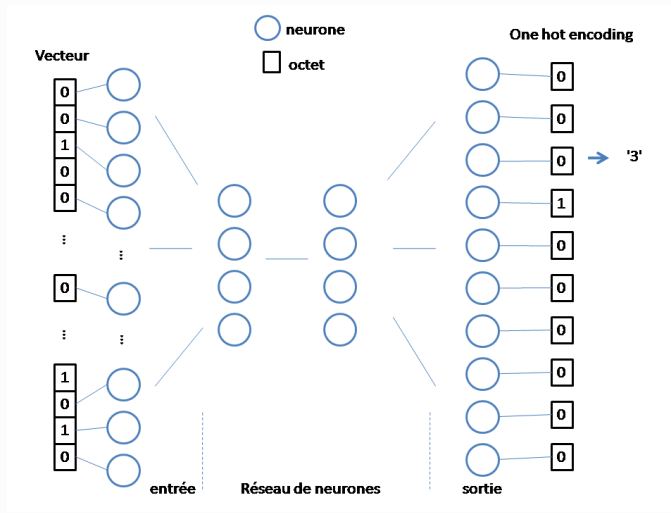

* A gauche, le réseau aura une entrée par pixel de l’image, soit une couche de 784 (28 x28) neurones

* A droite, la couche de sortie comportera 10 neurones, un par chiffre.

### Perceptron simple

Dans un premier temps, il n’y aura pas de couche intermédiaire.

**Sequential()** permet de créer le réseau, puis on ajoute les couches successivement avec **add()** en définissant les fonctions d’activation et les autres paramètres. Enfin, **compile()** permet de définir la métrique, la fonction de perte et l’optimisateur. La fonction **fit()** entraîne celui-ci sur nos données. La fonction **evaluate()** permet d’estimer le modèle sur notre jeu xtest

In [ ]:
def perceptrons(vector_size):
  model = Sequential()
  model.add(Dense(vector_size, activation='relu', input_dim=(vector_size)))
  model.add(Dense(10, activation='softmax')) # 10 sorties/classes
  model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
  return model

##Lançons à présent ce premier réseau:
model_perc = perceptrons(vector_size)
model_perc.fit(xtrain,ytrain,batch_size=200, nb_epoch=10, verbose=1)

 
#voir les predictions
model_perc.predict(xtest, verbose=0)
score = model_perc.evaluate(xtest, ytest, verbose=1)


### Deeper perceptrons

Nous avons ajouté une couche intermédiaire de 50 neurones avec fonction d’activation ReLU.

In [ ]:
def perceptrons_deeper(vector_size):
  model = Sequential()
  model.add(Dense(vector_size, activation='relu', input_dim=(vector_size)))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation='softmax')) # 10 sorties/classes
  model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
  return model
 
model_perc = perceptrons_deeper(vector_size)
model_perc.fit(xtrain,ytrain,batch_size=200, nb_epoch=10, verbose=1)

 
score = model_perc.evaluate(xtest, ytest, verbose=1)


### Convolution 2D

Le problème avec le perceptron, c’est que nous perdons l’information spatiale en linéarisant l’image. Avec la convolution 2D au contraire, l’image est effectivement traitée comme un objet à deux dimensions : le traitement de chaque pixel de l’image dépend de ses voisins. Nous utiliserons deux réseaux en série: le modèle convolutif puis un modèle perceptrons classique.

* Nous devons repartir des images originelles:

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split( X_train, y_train, test_size=0.3, random_state=123)
 
####reshape pour ajouter un canal de profondeur aux images (requis par keras)
### attention, ici ordre des parametres pour tensorflow
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[1],1) 
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[1],1)
 
# normaliser
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain=xtrain/255.0
xtest=xtest/255.0
 
# one hot encoding
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)

* Définissons maintenant le nouveau réseau 2D:

In [ ]:

def perceptrons_deeper(vector_size):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # attention input_shape different tensorflow ou theano
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten()) #passage NN perceptron
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics='accuracy'])
    return model

Pour la première couche, il faut noter l’ordre différent de input_shape selon le backend:

**input_shape=(28,28,1) pour tensorflow**

La structure est la suivante:

* La couche d’entrée qui applique également une convolution
* une deuxième couche de convolution
* un maxPooling, sous échantillonnage de facteur 2
* une couche dropout de régularisation pour éviter le sur-apprentissage
* une couche flatten pour passer en 1 dimension et accéder au réseau classique
* une couche dense qui sert d’interface entre les deux réseaux (1 sortie = 1 entrée)
* une nouvelle couche de dropout
* la couche de sortie

Voyons les performances:

In [ ]:
model_conv=conv_neuronet()
model_conv.fit(xtrain,ytrain,batch_size=200, nb_epoch=10, verbose=1)

score = model_conv.evaluate(xtest, ytest, verbose=1)